<img src="logo_UNSAM.jpg" align="right" width="150">

#### Análisis y Procesamiento de Señales

# *TS1 - Síntesis de señales*

### *Autora: Catalina Gonzalez Araujo*

### *Docentes: Mariano Llamedo Soria, David Ezequiel Benoit, Francisco Hernan Ledesma.*

# <u>**Introducción teórica**</u>

Una señal puede caracterizarse mediante parámetros como: 
- *Amplitud*: valor máximo de la onda.
- *Frecuencia*: número de ciclos por segundo.
- *Fase*: desplazamiento de la onda respecto al origen.
- *Energía y potencia*: magnitudes que me permiten medir la intensidad de la señal.

En el presente informe se trabajó con distintos tipos de señales, como **señales sinusoidales**, que son periódicas y pueden descomponerse en una suma de senos (*Transformada de Fourier*). Variando los parámetros de la señal sinusoidal, se observó como se comportan las señales en diferentes condiciones. 

Otras señales analizadas fueron las **cuadradas** y los **pulsos rectangulares**.

Además, se estudió la ortogonalidad  y la correlación entre las distintas señales, lo cual permite evaluar la independencia y la similitud entre ellas. 
- La **ortogonalidad** entre señales significa que no existe correlación ni interferencia entre ellas. Matemáticamente, esto ocurre cuando el producto interno o producto escalar entre ambas es cero.
- La **correlación** permite medir similitudes entre dos señales. Se calcula comparando una señal con una versión desplazada de otra, evaluando punto a punto; los picos altos indican alta similitud. Cuando se realiza este proceso sobre una misma señal, se denomina **autocorrelación**.

Adicionalmente, se analizó una propiedad trigonométrica, la cual facilita la manipulación de señales sinusoidales y muestra la relación que hay entre las distintas maneras de representarlas. 

Finalmente, se observó como se comporta un [efecto de sonido]("https://github.com/Catalina-git/APS/blob/fd150ab9a592a75f04cc94b9509fdb74633c33ff/TP1%20-%20S%C3%ADntesis%20de%20se%C3%B1ales/sonido.wav") y la forma de onda que este genera.

#### <u>Observación:</u> 
- Se calculó la energía ($E = \sum x^2[n]$) o potencia (${potencia} = \frac{(amplitud)^2}{2}$) según corresponda, de todas las señales analizadas. La potencia para señales periódicas y de duración finita, y la energía para señales no periódicas y de duración finita.
  
- En todos los casos se siguió el teorema de *Nyquist-Shannon*, el cual establece la frecuencia mínima necesaria para muestrear una señal analógica y poder reconstruirla de forma precisa sin perder información, esta debe ser al menos el doble de la frecuencia máxima de la señal. Este valor mínimo es: $fs \ge {frecuencia}$. Conociendo este teorema, se estimó la frecuencia de muestreo probando distintos valores hasta que la función se graficaba correctamentee. 

# <u>**Análisis y desarrollo**</u>

A continuación, se detallan los procedimientos realizados para cumplir con las consignas propuestas por la cátedra, junto con un análisis de cada resultado obtenido.

1) <font color=red><u> **Síntesis y gráfico de señales</u><font>**

<font color=green>**a.** *Señal sinusoidal de 2kHz*<font> 

En esta experiencia se graficó una señal sinusoidal con una frecuencia de 2*kHz*. Siguiendo el teorema de *Nyquist-Shannon*, se configuró una frecuencia de muestreo de 40*kHz* = 40000*Hz*. Al graficarla en el dominio temporal con el paso de muestras elegido ($N = 100$), se observó que esta señal presenta un comportamiento periódico y continuo. 

Luego, se calculó la potencia, la cual coincide con la esperada para una señal sinusoidal de *amplitud = 1* (${potencia} = \frac{1}{2} = 0.5$).

Potencia de la señal sinusoidal:  0.5000000000000001


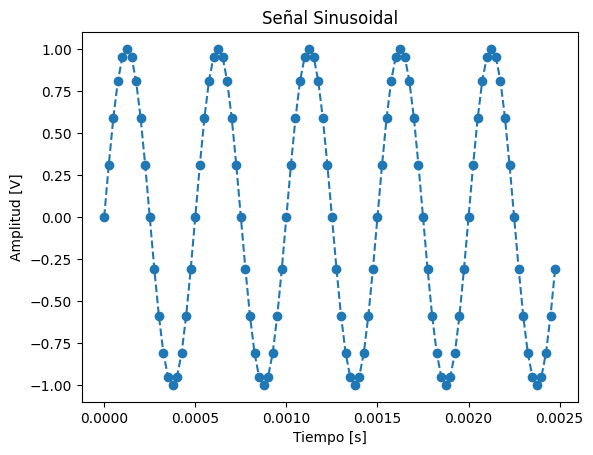

In [6]:
""" ------------------------------- EJERCICIO 1 ------------------------------- """
# Primero importo las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

# Defino mis funciones
# Funcion de una señal sinusoidal
def mi_funcion_sen(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, fs = 1000):
    """
    - amplitud: es la amplitud maxima. [amplitud] = [V]
    - offset: es mi amplitud media. [offset] = [V]
    - frecuencia: es la frecuencia de la señal. [frecuencia] = [Hz]
    - fase: es la fase inicial. [fase] = [rad]
    - N: es la cantidad de muestras a generar
    - fs: es la frecuencia de muestreo del ADC. [fs] = [Hz]
    """
    Ts = 1/fs # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) + offset

    return tt, xx

# Funcion para calcular la potencia de una señal
def calcular_potencia(x):
    return np.mean(x**2)

""" ITEM a """
# ------------------------------- Señal sinusoidal de 2kHz -------------------------------
# Llamo a mi funcion
_,fa = mi_funcion_sen(1, 0, 2000, 0, 100, 40000) # Pongo frecADC > 2 * frecuencia --> Teorema de Nyquist-Shannon

# Genero otra ventana para los graficos
plt.figure()  # Tamaño de la figura (ancho, alto)

plt.title("Señal Sinusoidal")

# Grafico la señal senoidal de 2KHz
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fa, 'o--')

# Calculo la potenacia
x = calcular_potencia(fa)
print("Potencia de la señal sinusoidal: ", x)

<font color=green>**b.** *Señal amplificada y desfazada en $\frac{\pi}{2}$*<font>

En esta oportunidad, se graficó la misma señal pero con mayor amplitud, y un desfase de $\frac{\pi}{2}$, el resto de los parámetros de la función de la señal senoidal son los mismos que para la graficada anteriormente. 

Al aumentar la amplitud, se incrementa la amplitud máxima respecto de la señal original, y el desfase provoca un desplazamiento temporal de un cuarto de periodo.

Es coherente que en este caso, la potencia sea mayor que en la sinusoidal base, ya que aumentamos el factor de amplificación.

Potencia de la señal amplificada y desfazada:  1.9999999999999998


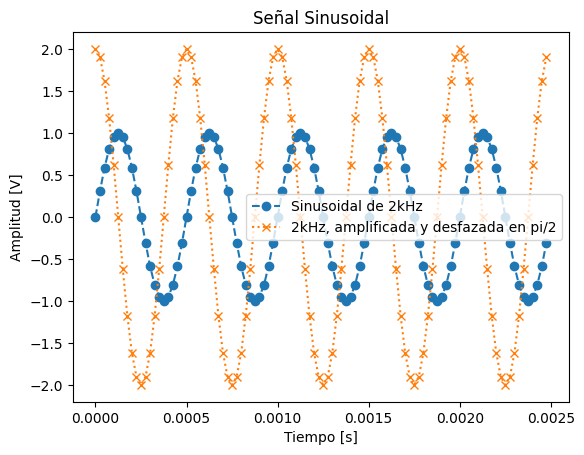

In [7]:
""" ITEM b """
# ------------------------------- Señal sinusoidal de 2kHz, amplificada y desfazada en pi/2 -------------------------------
_,fb = mi_funcion_sen(2, 0, 2000, np.pi/2, 100, 40000) 

# Grafico la señal senoidal de 2KHz, pero amplificada y desfazada en pi/2
plt.title("Señal Sinusoidal")

# Grafico la señal senoidal de 2KHz
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fa, 'o--',  label = 'Sinusoidal de 2kHz')
plt.legend()

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fb, 'x:', label = '2kHz, amplificada y desfazada en pi/2')
plt.legend()

# Calculo la potenacia
x = calcular_potencia(fb)
print("Potencia de la señal amplificada y desfazada: ", x)

<font color=green>**c.** *Señal modulada en amplitud por otra señal sinusoidal de 1kHz*<font>

Modular en amplitud una señal consiste en hacer que la amplitud de la señal original varíe en el tiempo de acuerdo con una señal modulante. 

En este ítem se realizó la modulación en amplitud de una señal sinusoidal (señal original) utilizando otra señal sinusoidal de la mitad de su frecuencia (*1kHz*) como modulante. 

Se realizó el producto entre ambas señales, y luego se graficó el resultado de esa señal modulada. El resultado es una nueva señal cuya envolvente sigue la forma de onda de la señal original. 

Se observa en el gráfico que la amplitud de la señal modulada crece y decrece con la frecuencia de la señal original. 

La potencia en este caso es intermedia, depende de la amplitud de la señal original y la modulada.

Potencia de la señal modulada:  0.25000000000000006


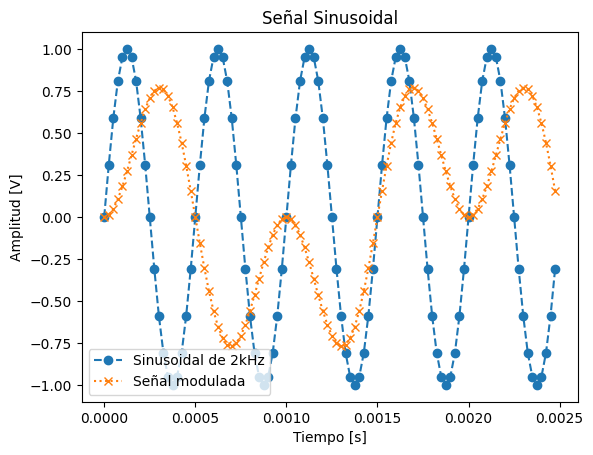

In [8]:
# Funcion de una señal sinusoidal modulada en amplitud por otra señal sinusoidal de la mitad de frecuencia
def mi_funcion_sen_modulada(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, fs = 1000):
   
    Ts = 1/fs # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) * np.sin(2 * np.pi * frecuencia/2 * tt + fase) + offset

    return tt, xx

""" ITEM c """
# ------------------------------- Señal sinusoidal modulada por otra señal sinusoidal de 1kHz -------------------------------
_,fc = mi_funcion_sen_modulada(1, 0, 1000, 0, 100, 40000)

# Grafico la señal senoidal de 2KHz, pero modulada por otra señal de la mitad de la frecuencia
plt.title("Señal Sinusoidal")

# Grafico la señal senoidal de 2KHz
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fa, 'o--',  label = 'Sinusoidal de 2kHz')
plt.legend()

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_, fc, 'x:', label = 'Señal modulada') # Genero el grafico de la señal
plt.legend()


# Calculo la potenacia
x = calcular_potencia(fc)
print("Potencia de la señal modulada: ", x)

<font color=green>**d.** *Señal recortada al 75% de su amplitud*<font>

El recorte de una señal sinusoidal produce que la forma de onda pierda suavidad, y aparecen picos planos en la envolvente. 

Recortar es aplicarle una limitación a la señal, es decir que cuando esta alcanza un cierto valor máximo (el 75% de la amplitud en este caso: $\frac{75 \cdot 1}{100} = 0.75$), todo lo que excede ese valor se "corta" y queda fijo ese límite hasta que la señal ya no supere ese valor y vuelva a sus valores originales. 

La potencia disminuye respecto a la señal original debido a que su amplitud efectiva disminuye.

Potencia de la señal recortada:  0.36944660112501054


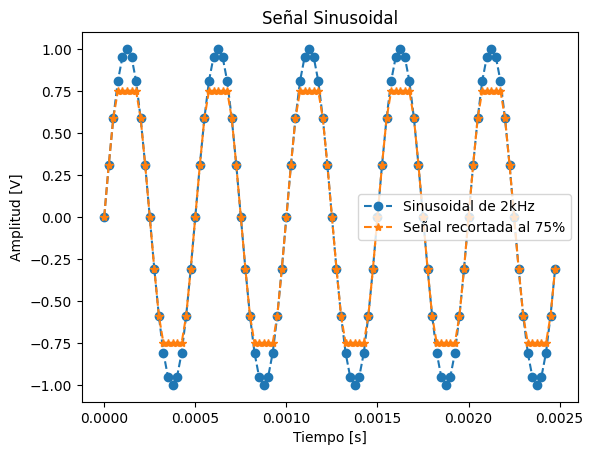

In [9]:
# Funcion para redcortar una funcion al 75% de su amplitud
def mi_funcion_sen_recortada(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, fs = 1000):
    
    Ts = 1/fs # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) + offset

    valor_corte = amplitud * 0.75 # es el 75% de la amplitud
    
    xx = np.clip(xx, - valor_corte, valor_corte) # Funcion de numpy que me recorta la señal
    
    return tt, xx

""" ITEM d """
# ------------------------------- Misma señal pero recortada al 75% de su potencia -------------------------------
_,fd = mi_funcion_sen_recortada(1, 0, 2000, 0, 100, 40000)

plt.title("Señal Sinusoidal")

# Grafico la señal senoidal de 2KHz
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fa, 'o--',  label = 'Sinusoidal de 2kHz')
plt.legend()

# Grafico la señal recortada
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(_,fd, '*--', label = 'Señal recortada al 75%')
plt.legend()


# Calculo la potenacia
x = calcular_potencia(fd)
print("Potencia de la señal recortada: ", x)

<font color=green>**e.** *Señal cuadrada de 4kHz*<font>

En este caso, se utilizó una función de [SciPy](https://docs.scipy.org/doc/scipy/reference/signal.html#waveforms) para graficar la señal cuadrada. 

Una señal cuadrada tiene saltos abruptos entre sus niveles máximos y mínimos. Entonces, es esperable que su potencia sea mayor que la de una senoidal de la misma amplitud. 

Potencia de la señal cuadrada:  1.0


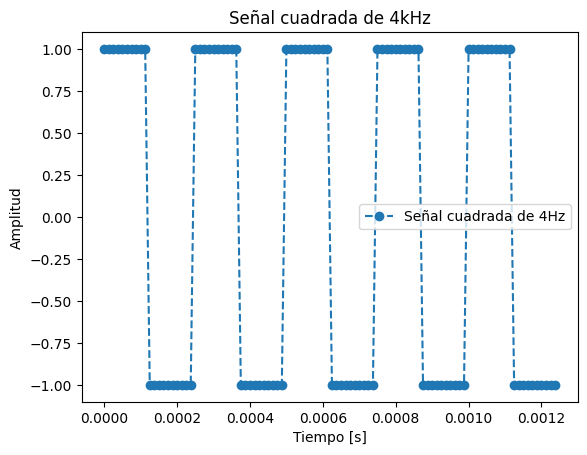

In [10]:
from scipy import signal # Libreria para graficar la señal cuadrada

# Funcion para una señal cuadrada
def mi_funcion_cuadrada (frecuencia, fs, N, offset, fase):
    Ts = 1/fs # Es el tiempo en el cual se toma cada muestra

    ttc = np.arange(start = 0, stop= N*Ts, step = Ts)

    xxc = signal.square(2 * np.pi * frecuencia * ttc + fase) + offset

    return ttc, xxc

""" ITEM e """
# ------------------------------- Señal cuadrada de 4kHz -------------------------------
# Llamo a mi funcion
_,fe = mi_funcion_cuadrada(4000, 80000, 100, 0, 0)

# Grafico la señal cuadrada
plt.title('Señal cuadrada de 4kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(_,fe, 'o--', label = 'Señal cuadrada de 4Hz')
plt.legend()


# Calculo la potenacia
x = calcular_potencia(fe)
print("Potencia de la señal cuadrada: ", x)

<font color=green>**f.** *Pulso rectangular de 10ms*<font>

Un pulso muestra una energía finita concentrada en un intervalo de tiempo determinado. En este caso, ese intervalo son 10*ms*, es decir que la función vale cero siempre menos en ese tiempo que se le indica a la función. 

A diferencia de las otras señales, que son periódicas, para el pulso no se define potencia, sino que se calcula la energía total ($E = \sum (x[n])^2$). Se observó que la energía depende tanto de la amplitud como de la duración del pulso.


PULSO RECTANGULAR DE 10ms
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Energia del pulso rectangular:  10.0


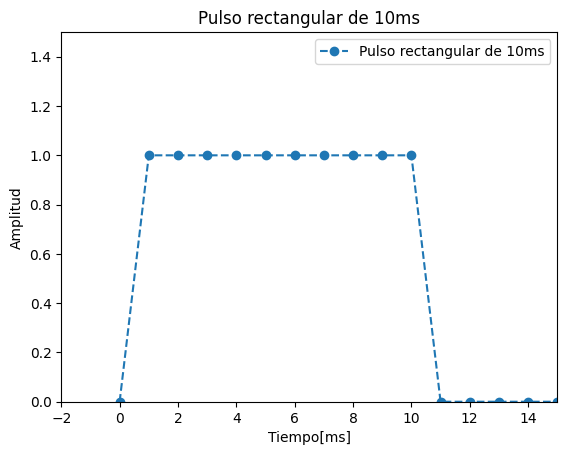

In [11]:
# Funcion para un pulso
def mi_funcion_pulso (t0, tf, N, h):
    """
    t0: tiempo donde empieza el pulso
    tf: hasta donde 
    N: cantidad de muestras
    h: altura

    """
    
    x = np.zeros(N)
    x[t0:tf] = h
    
    print(f"\nPULSO RECTANGULAR DE 10ms\n{x}")
    
    return x

# Funcion para calcular la energia de una señal
def calcular_energia(x):
    return np.sum(x**2)

""" ITEM f """
# ------------------------------- Pulso rectangular de 10ms -------------------------------
ff = mi_funcion_pulso(1, 11, 100, 1)

# Calculo la energia
x = calcular_energia(ff)
print("\nEnergia del pulso rectangular: ", x)

# Grafico
plt.title('Pulso rectangular de 10ms')
plt.plot(ff, 'o--', label = 'Pulso rectangular de 10ms')
# otra manera de graficar el pulso: 
# plt.stem(x)
plt.xlabel('Tiempo[ms]')
plt.ylabel('Amplitud')
plt.axis([-2,15,0,1.5]) #Limites del grafico ([Xmin,Xmax,Ymin,Ymax]), si no se agrega este plt (axis) el programa por default busca mostrar todo el grafico completo
plt.legend()
plt.show()


2) <font color=red><u> **Verificación de ortogonalidad</u><font>**

   En esta oportunidad, se comprobo la ortogonalidad entre la primer señal senoidal de 2*kHz* y cada una de las demas. Se calculó el producto interno con una funcion de *numpy* (*np.dot*). Todas las señales se configuraron con la misma longitud ($N = 100$ muestras) para que el cálculo sea válido, ya que de lo contrario no se podría calcular el producto interno.

   Teóricamente, la señal sinusoidal original y la misma amplificada y desfazada en $\frac{\pi}{2}$, deberian ser ortogonales, ya que el producto interno deberia dar exactamente cero. Sin embargo, debido a la discretización, el producto interno no resulta estrictamente nulo. En la práctica, al calcularlo sobre un número finito de *N-muestras*, se obtiene un valor muy pequeño pero distinto de cero. Aunque el programa indica que no son ortogonales por no ser el producto interno exactamente cero, el valor hallado es lo suficientemente pequeño como para considerarse ortogonalidad en la práctica. 

    En cambio, la señal modulada en amplitud, la recortada, la cuadrada o el pulso rectangular no cumplen estrictamente la propiedad de ortogonalidad, ya que tienen componentes que se relacionan con la señal original, es decir que existe una correlacion entre ambas. Y observando lo programado, podemos afirmar que la señal sinusoidal original con estas otras señales no cumplen ortogonalidad. 

In [12]:
""" ------------------------------- EJERCICIO 2 ------------------------------- """
#Funcion para calcular ortogonalidad entre dos señales
def mi_funcion_ortogonalidad (f,g):
    productoInterno = np.dot(f,g)
    
    print("Producto interno entre las dos señales: ", productoInterno)
    
    if (productoInterno == 0):
        return True
    else: 
        return False

print("\nORTOGONALIDAD ENTRE SEÑALES")

# Verifico ortogonalidad
if (mi_funcion_ortogonalidad(fa, fb)):
    print("La funcion del item a y del item b son ortogonales\n")
else:
    print("La funcion del item a y del item b NO son ortogonales\n")
    
if (mi_funcion_ortogonalidad(fa, fc)):
  print("La funcion del item a y del item c son ortogonales\n")
else:
  print("La funcion del item a y del item c NO son ortogonales\n")
        
if (mi_funcion_ortogonalidad(fa, fd)):
   print("La funcion del item a y del item d son ortogonales\n")
else:
   print("La funcion del item a y del item d NO son ortogonales\n")
            
if (mi_funcion_ortogonalidad(fa, fe)):
  print("La funcion del item a y del item e son ortogonales\n")
else:
  print("La funcion del item a y del item e NO son ortogonales\n")
  
if (mi_funcion_ortogonalidad(fa, ff)):
    print("La funcion del item a y del item f son ortogonales\n")
else:
    print("La funcion del item a y del item f NO son ortogonales\n")


ORTOGONALIDAD ENTRE SEÑALES
Producto interno entre las dos señales:  2.1094237467877974e-15
La funcion del item a y del item b NO son ortogonales

Producto interno entre las dos señales:  -1.9401419112461666
La funcion del item a y del item c NO son ortogonales

Producto interno entre las dos señales:  42.72076277255257
La funcion del item a y del item d NO son ortogonales

Producto interno entre las dos señales:  63.13751514675043
La funcion del item a y del item e NO son ortogonales

Producto interno entre las dos señales:  6.313751514675044
La funcion del item a y del item f NO son ortogonales



3) <font color=red><u> **Gráfico de correlación entre señales</u><font>**

En esta parte del trabajo de calculó, por un lado la autocorrelación de la señal sinusoidal de 2*kHz*, y por otro lado la correlación cruzada entre esta y las demás señales graficadas.

La autocorrelación evidencia la periodicidad de la señal, mientras que la correlación cruzada permite cuantificar la similitud entre las distintas señales.


PULSO RECTANGULAR DE 10ms
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


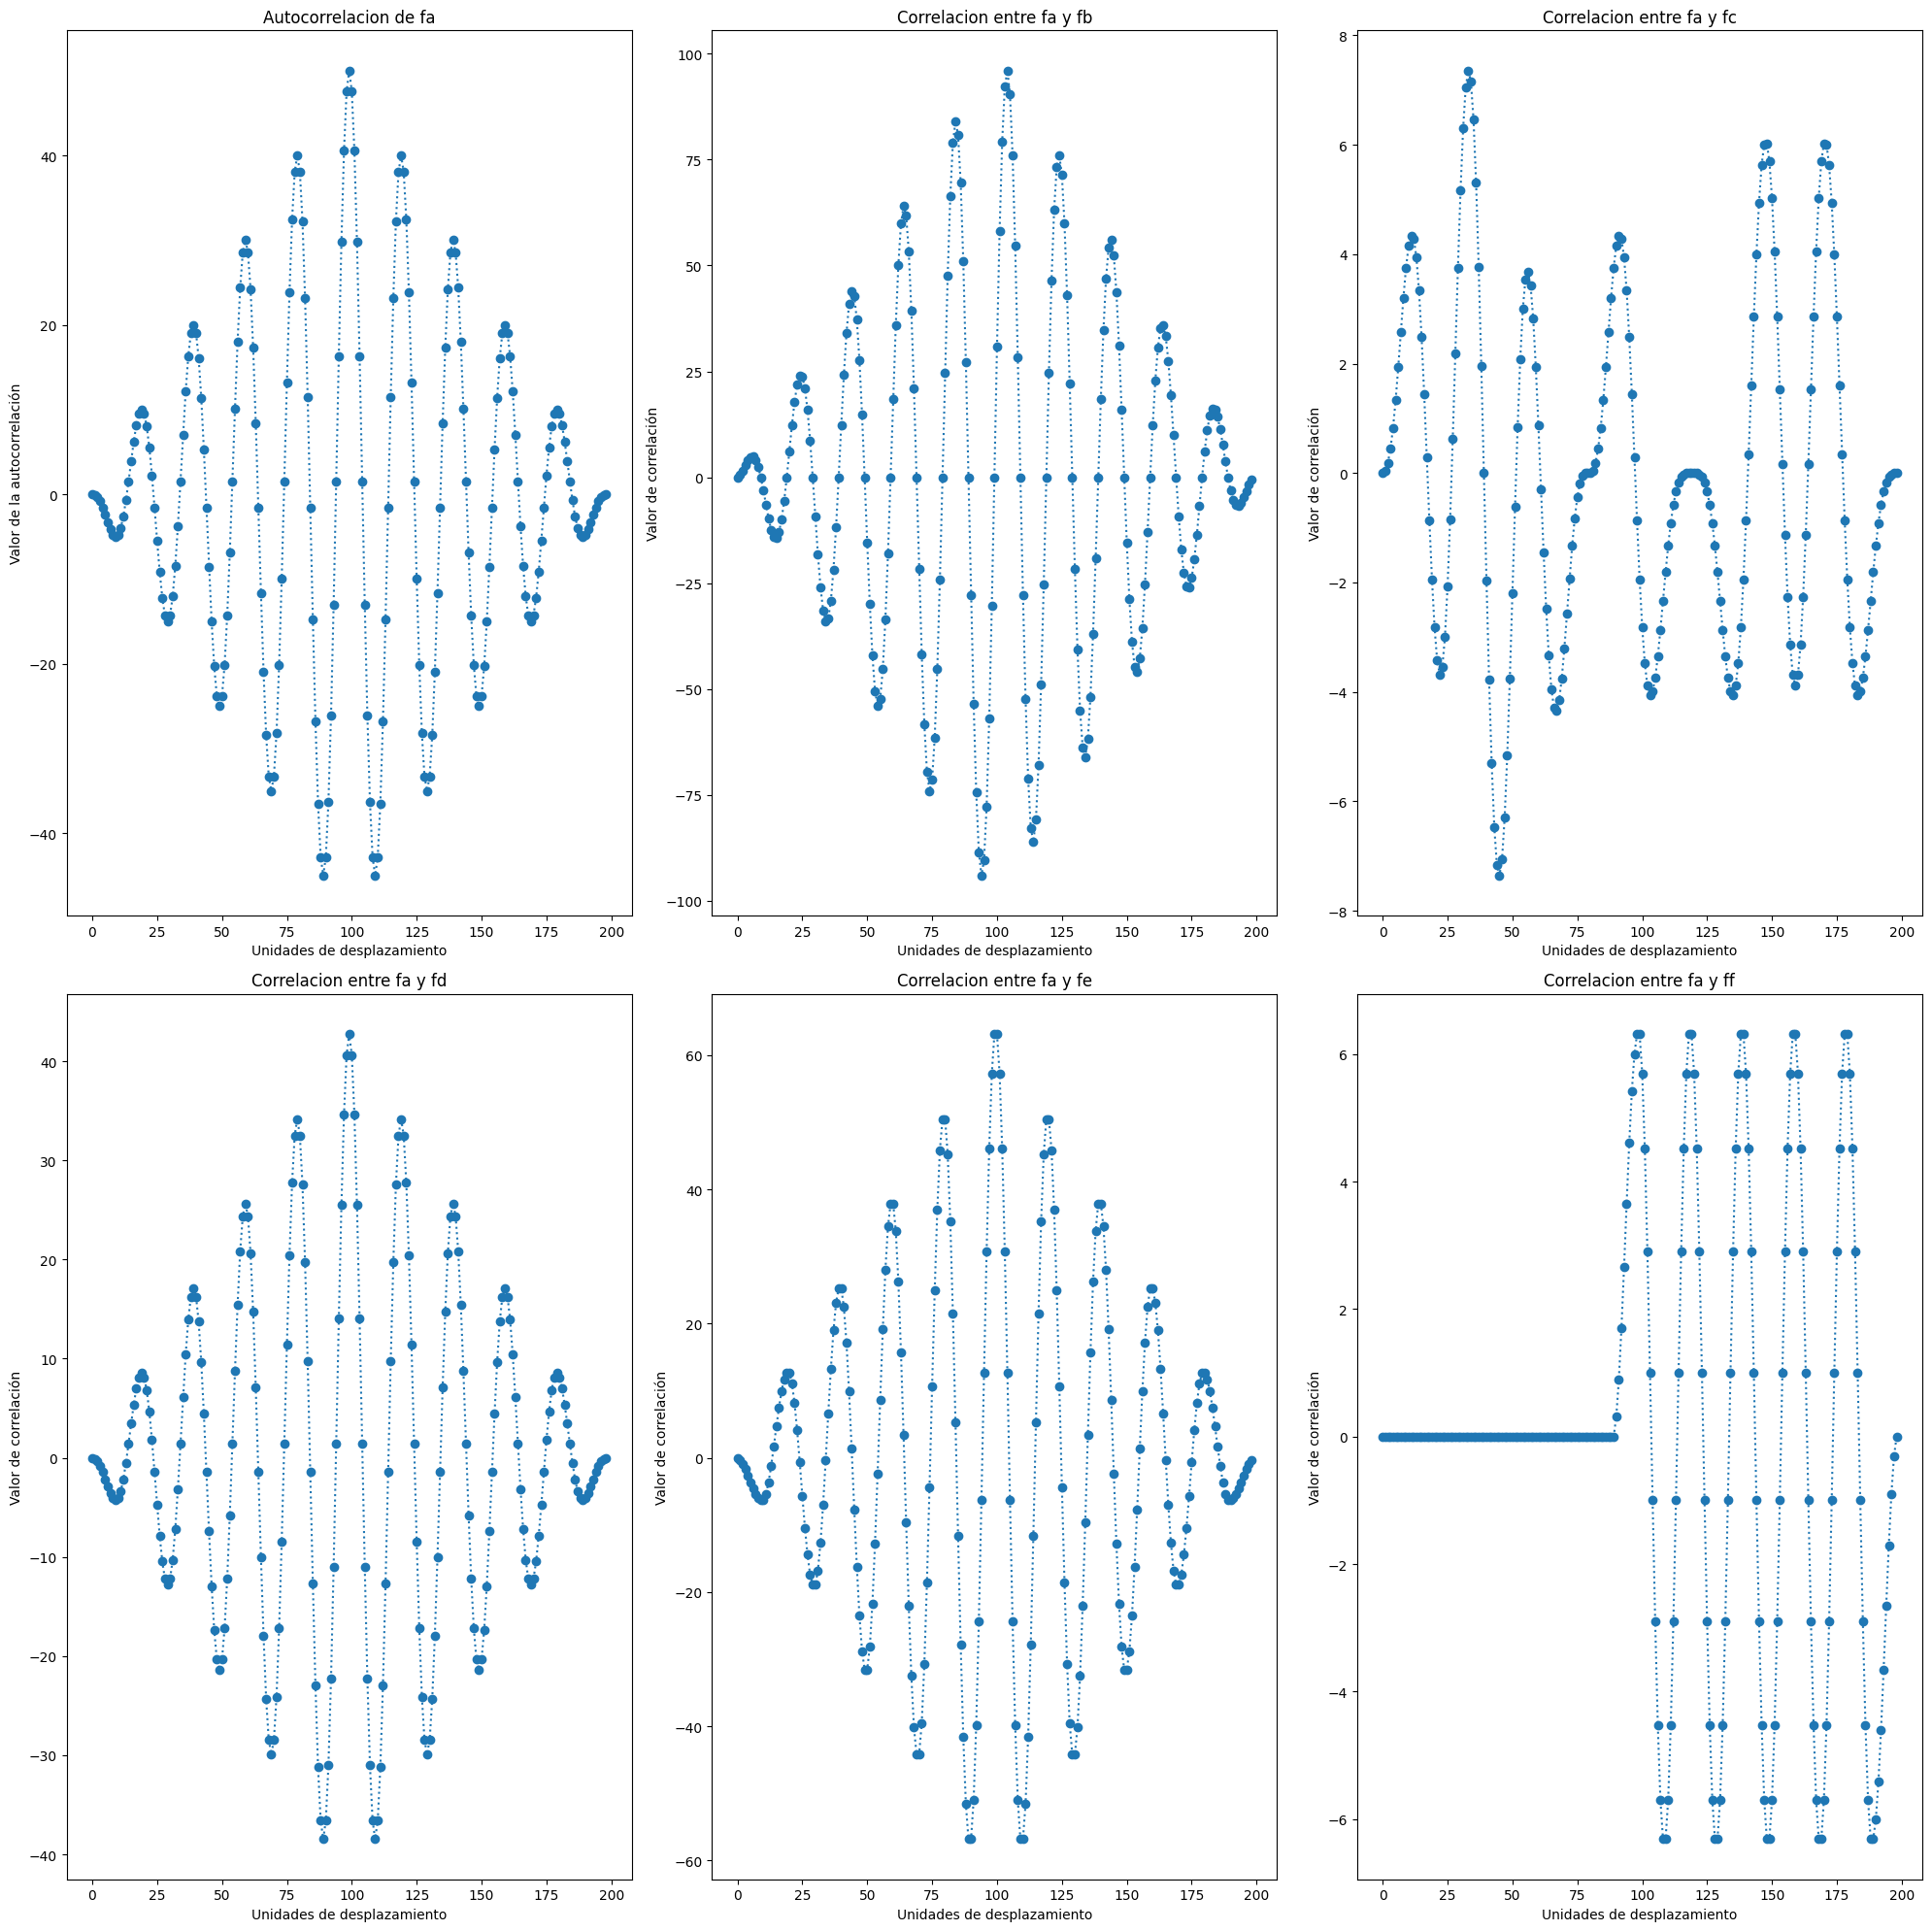

In [13]:
""" ------------------------------- EJERCICIO 3 ------------------------------- """
# ------------------------------- Correlacion -------------------------------
from scipy import signal

_,fa = mi_funcion_sen(1, 0, 2000, 0, 100, 40000)
rxx1 = signal.correlate(fa,fa) # Autocorrelacion entre fa

_,fb = mi_funcion_sen(2, 0, 2000, np.pi/2, 100, 40000)
rxx2 = signal.correlate(fa,fb) # Correlacion cruzada entre fa y fb

_,fc = mi_funcion_sen_modulada(1, 0, 1000, 0, 100, 40000)
rxx3 = signal.correlate(fa,fc) # Correlacion cruzada entre fa y fc

_,fd = mi_funcion_sen_recortada(1, 0, 2000, 0, 100, 40000)
rxx4 = signal.correlate(fa,fd) # Correlacion cruzada entre fa y fd

_,fe = mi_funcion_cuadrada(4000, 80000, 100, 0, 0)
rxx5 = signal.correlate(fa,fe) # Correlacion cruzada entre fa y fe

ff = mi_funcion_pulso(1, 11, 100, 1)
rxx6 = signal.correlate(fa,ff) # Correlacion cruzada entre fa y ff

# Grafico de las correlaciones
fig, axes = plt.subplots(2, 3, figsize=(20, 20))  # Tamaño de la figura: ancho=15, alto=8
    
plt.subplot(2,3,1)
plt.title('Autocorrelacion de fa')
plt.plot(rxx1, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de la autocorrelación')

plt.subplot(2,3,2)
plt.title('Correlacion entre fa y fb')
plt.plot(rxx2, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de correlación')

plt.subplot(2,3,3)
plt.title('Correlacion entre fa y fc')
plt.plot(rxx3, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de correlación')

plt.subplot(2,3,4)
plt.title('Correlacion entre fa y fd')
plt.plot(rxx4, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de correlación')

plt.subplot(2,3,5)
plt.title('Correlacion entre fa y fe')
plt.plot(rxx5, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de correlación')

plt.subplot(2,3,6)
plt.title('Correlacion entre fa y ff')
plt.plot(rxx6, 'o:')
plt.xlabel('Unidades de desplazamiento')
plt.ylabel('Valor de correlación')

plt.tight_layout() # Ajusta el espacio entre subplots
plt.show()

4) <font color=red><u> **Verificación de propiedad trigonométrica</u><font>**

    Se verificó gráficamente la siguiente propiedad trigonométrica
   $$
   2 \cdot \sin(\alpha) \cdot \sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
   $$

   Esta igualdad se cumple analíticamente, es una propiedad. Entonces, para poder comprobarlo gráficamente, primero se graficó un lado del igual ($2 \cdot \sin(\alpha) \cdot \sin(\beta)$), y luego el otro ($\cos(\alpha - \beta) - \cos(\alpha + \beta)$).Para poder graficar ambos lados se utilizó la funcion `mi_funcion_sen`, ya utilizada en este trabajo, y se creó otra función para el segundo lado de la igualdad `mi_funcion_cos`, para poder graficar el coseno.  

   Con eso ya me bastaba para ver que eran iguales, lo que supone que la igualdad se cumple. Sin embargo, para estar completamente segura, grafiqué una superposición entre ambos lados del igual, como si fuesen dos funciones distintas graficadas en un mismo gráfico.

   Se observó que las funciones son idénticas punto a punto, lo que confirma la validez de la identidad trigonométrica en el contexto de señales, donde $ \alpha = \omega \cdot t $ y $\beta = \frac{\omega}2 \cdot t$.
   

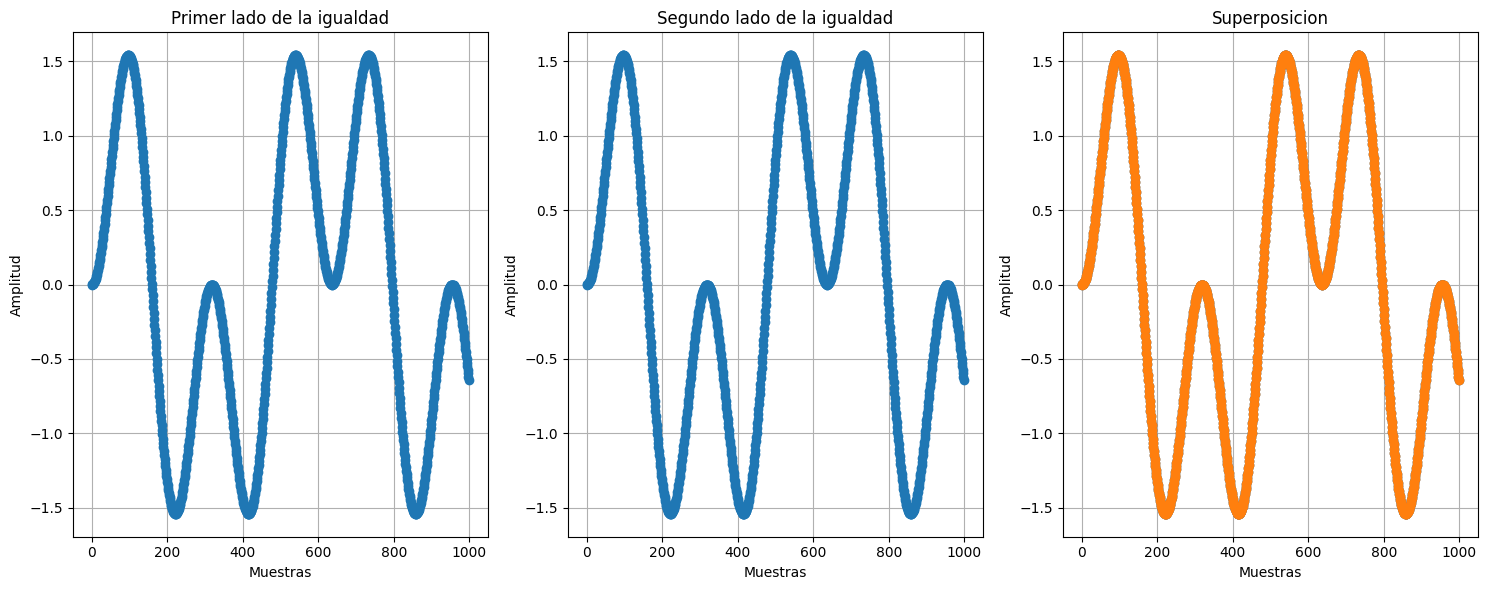

In [14]:
""" ------------------------------- EJERCICIO 4 ------------------------------- """
# Funcion del coseno
def mi_funcion_cos(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, fs = 1000):
    
    Ts = 1/fs # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.cos(2 * np.pi * frecuencia * tt + fase) + offset

    return tt, xx

# Funcion para verificar la propiedad trigonometrica que me dan
def mi_funcion_propiedad(a,b):
    _,xa = mi_funcion_sen(frecuencia = a)
    _,xaa = mi_funcion_sen(frecuencia = b)
    
    f = 2 * xa * xaa
    
    _,xb = mi_funcion_cos(frecuencia = a - b)
    _,xbb = mi_funcion_cos(frecuencia = a + b)
    
    g = xb - xbb
    
    return f, g

f,_ = mi_funcion_propiedad(np.pi, np.pi/2) 
_,g = mi_funcion_propiedad(np.pi, np.pi/2) 


fig, axes = plt.subplots(1, 3, figsize=(15, 6))  # Tamaño de la figura: ancho=15, alto=8

plt.subplot(1,3,1)
plt.title('Primer lado de la igualdad')
plt.plot(f, 'o:')
plt.xlabel('Muestras')   
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(1,3,2)
plt.title('Segundo lado de la igualdad')
plt.plot(g,'o:')
plt.xlabel('Muestras') 
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(1,3,3)
plt.title('Superposicion')
plt.plot(f, 'o:')
plt.plot(g,'o:')
plt.xlabel('Muestras')  
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout() # Ajusta el espacio entre subplots
plt.show()

5) <font color=red><u> **<u>Análisis de archivo *.wav* (BONUS)</u><font>**

    En esta oportunidad, se descargó un archivo de [sonido]("https://github.com/Catalina-git/APS/blob/fd150ab9a592a75f04cc94b9509fdb74633c33ff/TP1%20-%20S%C3%ADntesis%20de%20se%C3%B1ales/sonido.wav") en formato *.wav*, y se convirtió a mono (una sola salida, no distingue entre izquierda y derecha) en caso de ser estéreo. Se generó el eje temporal en segundos, se graficó la forma de onda, y se calculó la energía total.

    Es decir, que se descargó una señal continua (analógica), se discretizó mediante código, y luego se analizó digitalmente (gráfico y cálculo de energía). Pasamos de tener una señal analógica dificil de analizar, a la misma señal digitalizada, a la cual se pudo estudiar.
   
   Para poder observar la forma de onda en el dominio temporal del sonido descargado, utilice funciones de [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sweep_poly.html#scipy.signal.sweep_poly).

   Se observaron variaciones en la amplitud correspondientes a la información sonora de la señal.

   La energía calculada, me permite cuantificar la intensidad del audio.

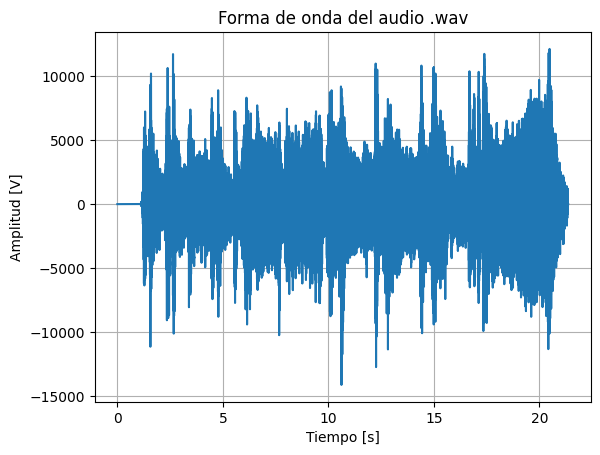


Energía total: 2907626643567.25


In [15]:
""" ------------------------------- EJERCICIO 5 ------------------------------- """
from scipy.io import wavfile # Libreria que uso para el ejercicio 5

# Cargo el archivo .wav
fs, data = wavfile.read('sonido.wav') # fs es la frecuencia de muestreo

# Una señal ESTEREO tiene dos canales, uno para el lado izquierdo y uno para el derecho
# Se usa para que un sonido venga de muchos lugares
# Una señal MONO es una señal que sale toda por el mismo canal, sin distinguir entre izquierda y derecha
# Uso mono porque para analizar señales es mas simple
# Si es estereo, lo convierto a mono
if data.ndim > 1:
    data = data.mean(axis = 1)
    
t = np.arange(len(data)) / fs # Creo el eje del tiempo

# Grafico
plt.figure()
plt.plot(t, data)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.title('Forma de onda del audio .wav')
plt.grid()
plt.show()

# Calculo la energia
energia = np.sum(data**2) # La energia es la suma del cuadrado de las muestras, me da "cuan intensa" es la señal
print(f"\nEnergía total: {energia:.2f}")

# <u>**Conclusiones**</u>

La síntesis y el hecho de graficar señales me permitió comprender como los distintos parámetros - amplitud, desfazaje, modulacion y recorte - afectan a la forma de onda y a sus propiedades de energía o potencia. Se pudo observar cómo una misma señal se comporta de manera distinta al variar sus parámetros. 

Analizando el calculo de potencia, se comprobó que esta se incrementa proporcionalmente a la amplitud. Lo cual es lógico ya que ${potencia} = \frac{(amplitud)^2}{2}$. 

El análisis de ortogonalidad evidenció que señales comparten componentes y cuáles son independientes. 

Por otro lado, el análisis de la autocorrelación entre señales, resaltó la periodicidad de una señal, mientras que la correlación cruzada resultó útil para medir similitudes entre señales diferentes. 

Verificar la propiedad trigonométrica dada, mostró la concordancia entre la teoría matemática y la representacion gráfica de señales.

Finalmente, el análisis de un archivo de sonido *.wav*, demostró que todos los conceptos aplicados a señales son igualmente aplicables en audios. Esto se debe a que el sonido es una onda, y por lo tanto puede analizarse como una señal en el dominio temporal.

# <u>**Autoevaluación del aprendizaje**</u>

Para concluir con el informe se realizó una autoevaluacion del aprendizaje.

Durante la realización de las actividades propuestas pude afianzar algunos conceptos de teoría y, al mismo tiempo, me surgieron nuevas duda. Siento que todavía no termino de comprender completamente algunos aspectos teóricos debido a la cantidad de contenido nuevo en poco tiempo. 

En cuanto a la programacion, me sentí bastante cómoda, los codigos estuvieron dentro de un nivel de dificultad manejable, y las funciones de *numpy* y *SciPy* me ayudaron a resolver los ejercicios de manera eficiente. 

Por último, la *IA* me resultó útil en: 
- Código: ayuda en la implementación.
- Conceptos teóricos: para entender mejor algunos temas.
